## TASK 4 - Face Mask Detection using Convolutional Neural Networks

Group Number: #INSERT HERE


In [51]:
%load_ext autoreload
%autoreload 1
%aimport my_model, utils, my_datamodule, my_model, my_trainer
%matplotlib inline
import os

import numpy as np
import torch
from torchinfo import summary

import my_datamodule
import my_model
import my_trainer
import utils

torch.manual_seed(30)
np.random.seed(30)

if not os.path.exists(os.path.join(os.getcwd(), 'results')):
    os.makedirs(os.path.join(os.getcwd(), 'results'))

# Check GPU connection
gpu_active = torch.cuda.is_available()
print("GPU is used" if gpu_active else "CPU is used")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU is used


### 1. Data import and Preparation

In TASK3 we used a common computer vision processing step for classification problems in computer vision - manual feature extraction. This time we want to use a learning approach which does not need handcrafted inputs. 

Implement the **get_transforms** method. Make sure it returns a transformation that maps input images to tensor values and resizes them to a square image.

For simplicity and actuality you will detect if a person wears a face mask or not. Follow the instructions in the assignment description. Implement the get_transform method of **my_datamodule.DataModule** and create an instance of **DataModule**. Use an image size of 64 and a batch_size around **64**. Depending on your processor you can increase the amount of threads that load data with the parameter **num_worker**. For example use **num_workers=4** to start four worker threads for data loading and preprocessing. 

In [52]:
data_module = my_datamodule.DataModule(img_size=64, batch_size=64)

### 2. Simple Face Mask Detection CNN
#### 2.1 Network Structure

This section will familiarize you with the steps of creating a deep artificial neural network from scratch. Implement the **__init__** and **forward** methods of **my_model.MaskClassifier** according to the instructions.

Create a simple classification model using ***model=my_model.MaskClassifier(..)***. Set the image size to **64** (the dataset will be proccessed to squared images) and drop out value to **0**.

Take a look at the structure of your model by calling ***summary(model, (32, 3, img_size, img_size))***

In [65]:
img_size = 64
model = my_model.MaskClassifier(name="mask_classifier", img_size=img_size, dropout=0, batch_norm=False)
summary(model, (32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
MaskClassifier                           [32, 1]                   --
├─Conv2d: 1-1                            [32, 32, 62, 62]          896
├─MaxPool2d: 1-2                         [32, 32, 31, 31]          --
├─Conv2d: 1-3                            [32, 32, 29, 29]          9,248
├─MaxPool2d: 1-4                         [32, 32, 14, 14]          --
├─Linear: 1-5                            [32, 1]                   6,273
Total params: 16,417
Trainable params: 16,417
Non-trainable params: 0
Total mult-adds (M): 359.30
Input size (MB): 1.57
Forward/backward pass size (MB): 38.38
Params size (MB): 0.07
Estimated Total Size (MB): 40.02

***
#### Q1: Take a look at the structure of the MaskClassifier CNN. What does the column 'Output Shape' represent? What does the column Param represent? Why is the shape decreasing? Finally, explain why the last layer has length 1. 

#### !TODO: Explain OutputShape and Param

The last layer has length 1 because we want to make a binary decision: Does the person in the image wear a mask or not?

#### 2.2 Training 

In this step you will train the model with the training and validation data set iterator. The **my_trainer** module provides functionality for training and logging the learning progress.

First create a trainer instance using my_trainer.Trainer(...) and pass the previosuly created model and datamodule to it. If you have a device that supports cuda you can pass **gpu=True** to speed up training. Use trainer.fit(...) to start the training process. Depending on wether you use a GPU or CPU and the number of epochs, the training can take a while. Start with a learning rate of **0.0001** and **50** epochs. The loss should decrease and the accuracy on the validation should increase. The weights of the best model are saved in separate files in your results directory automatically.

In [58]:
# I get an error here, values between 0 and 1? Maybe a sigmoid is missing somewhere? Idk.
trainer = my_trainer.Trainer(model, data_module)
trainer.fit(epochs=50, lr=0.0001)

Epoch 0: 100%|█████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.13it/s]


Epoch 0 Training: Loss: 0.5257025957107544 Accuracy: 0.8354223966598511
Epoch 0 Validation: Loss: 0.47826018929481506 Accuracy: 0.8226562142372131


Epoch 1: 100%|█████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.17it/s]


Epoch 1 Training: Loss: 0.42263054847717285 Accuracy: 0.8696486353874207
Epoch 1 Validation: Loss: 0.37738874554634094 Accuracy: 0.8675346970558167


Epoch 2: 100%|█████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.09it/s]


Epoch 2 Training: Loss: 0.34424012899398804 Accuracy: 0.8915980458259583
Epoch 2 Validation: Loss: 0.31794416904449463 Accuracy: 0.8901910185813904


Epoch 3: 100%|█████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.09it/s]


Epoch 3 Training: Loss: 0.3001156449317932 Accuracy: 0.8975504040718079
Epoch 3 Validation: Loss: 0.2794705033302307 Accuracy: 0.9057291150093079


Epoch 4: 100%|█████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.03it/s]


Epoch 4 Training: Loss: 0.27538585662841797 Accuracy: 0.906479001045227
Epoch 4 Validation: Loss: 0.2551037669181824 Accuracy: 0.914843738079071


Epoch 5: 100%|█████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.91it/s]


Epoch 5 Training: Loss: 0.25740352272987366 Accuracy: 0.9059923887252808
Epoch 5 Validation: Loss: 0.24641920626163483 Accuracy: 0.9151909351348877


Epoch 6: 100%|█████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.96it/s]


Epoch 6 Training: Loss: 0.24508549273014069 Accuracy: 0.9152072072029114
Epoch 6 Validation: Loss: 0.22617828845977783 Accuracy: 0.9267361164093018


Epoch 7: 100%|█████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.10it/s]


Epoch 7 Training: Loss: 0.23447687923908234 Accuracy: 0.9188416004180908
Epoch 7 Validation: Loss: 0.21772481501102448 Accuracy: 0.9307291507720947


Epoch 8: 100%|█████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.93it/s]


Epoch 8 Training: Loss: 0.23015040159225464 Accuracy: 0.9180117249488831
Epoch 8 Validation: Loss: 0.2100483626127243 Accuracy: 0.9320312142372131


Epoch 9: 100%|█████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.99it/s]


Epoch 9 Training: Loss: 0.2225666493177414 Accuracy: 0.9223614931106567
Epoch 9 Validation: Loss: 0.20814423263072968 Accuracy: 0.9347221851348877


Epoch 10: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.10it/s]


Epoch 10 Training: Loss: 0.21511586010456085 Accuracy: 0.9244219660758972
Epoch 10 Validation: Loss: 0.19916146993637085 Accuracy: 0.9321179986000061


Epoch 11: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.00it/s]


Epoch 11 Training: Loss: 0.2125738263130188 Accuracy: 0.9259958863258362
Epoch 11 Validation: Loss: 0.19734631478786469 Accuracy: 0.9293403029441833


Epoch 12: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.97it/s]


Epoch 12 Training: Loss: 0.20804713666439056 Accuracy: 0.9254235625267029
Epoch 12 Validation: Loss: 0.19514618813991547 Accuracy: 0.9360242486000061


Epoch 13: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.08it/s]


Epoch 13 Training: Loss: 0.204151451587677 Accuracy: 0.9253662824630737
Epoch 13 Validation: Loss: 0.18744580447673798 Accuracy: 0.9373263716697693


Epoch 14: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.93it/s]


Epoch 14 Training: Loss: 0.20005270838737488 Accuracy: 0.9273123145103455
Epoch 14 Validation: Loss: 0.18394799530506134 Accuracy: 0.9360242486000061


Epoch 15: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.10it/s]


Epoch 15 Training: Loss: 0.20322522521018982 Accuracy: 0.9231055378913879
Epoch 15 Validation: Loss: 0.1818370372056961 Accuracy: 0.9399304986000061


Epoch 16: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.81it/s]


Epoch 16 Training: Loss: 0.19275769591331482 Accuracy: 0.9299737215042114
Epoch 16 Validation: Loss: 0.1772816926240921 Accuracy: 0.9425346851348877


Epoch 17: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  3.00it/s]


Epoch 17 Training: Loss: 0.18875963985919952 Accuracy: 0.9284283518791199
Epoch 17 Validation: Loss: 0.1804448515176773 Accuracy: 0.9412326216697693


Epoch 18: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.03it/s]


Epoch 18 Training: Loss: 0.18541662395000458 Accuracy: 0.9327781200408936
Epoch 18 Validation: Loss: 0.17637856304645538 Accuracy: 0.9425346851348877


Epoch 19: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.05it/s]


Epoch 19 Training: Loss: 0.18419304490089417 Accuracy: 0.9320340752601624
Epoch 19 Validation: Loss: 0.17304350435733795 Accuracy: 0.9412326216697693


Epoch 20: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.06it/s]


Epoch 20 Training: Loss: 0.1805092692375183 Accuracy: 0.9338942170143127
Epoch 20 Validation: Loss: 0.16762514412403107 Accuracy: 0.9451388716697693


Epoch 21: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.91it/s]


Epoch 21 Training: Loss: 0.1767798215150833 Accuracy: 0.935926079750061
Epoch 21 Validation: Loss: 0.17120058834552765 Accuracy: 0.9425346851348877


Epoch 22: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.10it/s]


Epoch 22 Training: Loss: 0.17567870020866394 Accuracy: 0.9377862215042114
Epoch 22 Validation: Loss: 0.1688218116760254 Accuracy: 0.9425346851348877


Epoch 23: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.06it/s]


Epoch 23 Training: Loss: 0.17463791370391846 Accuracy: 0.9350102543830872
Epoch 23 Validation: Loss: 0.16820202767848969 Accuracy: 0.9412326216697693


Epoch 24: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.04it/s]


Epoch 24 Training: Loss: 0.17534089088439941 Accuracy: 0.9374427795410156
Epoch 24 Validation: Loss: 0.16595615446567535 Accuracy: 0.9412326216697693


Epoch 25: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.00it/s]


Epoch 25 Training: Loss: 0.16890661418437958 Accuracy: 0.9417353272438049
Epoch 25 Validation: Loss: 0.17338603734970093 Accuracy: 0.9426215291023254


Epoch 26: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.05it/s]


Epoch 26 Training: Loss: 0.1660028100013733 Accuracy: 0.9407624006271362
Epoch 26 Validation: Loss: 0.16434909403324127 Accuracy: 0.941319465637207


Epoch 27: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.01it/s]


Epoch 27 Training: Loss: 0.16365787386894226 Accuracy: 0.9413346648216248
Epoch 27 Validation: Loss: 0.15810509026050568 Accuracy: 0.9425346851348877


Epoch 28: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.92it/s]


Epoch 28 Training: Loss: 0.16218453645706177 Accuracy: 0.9399325251579285
Epoch 28 Validation: Loss: 0.1552720069885254 Accuracy: 0.9451388716697693


Epoch 29: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.98it/s]


Epoch 29 Training: Loss: 0.16105219721794128 Accuracy: 0.942078709602356
Epoch 29 Validation: Loss: 0.15968455374240875 Accuracy: 0.9439236521720886


Epoch 30: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.02it/s]


Epoch 30 Training: Loss: 0.1611160933971405 Accuracy: 0.942651093006134
Epoch 30 Validation: Loss: 0.1606958508491516 Accuracy: 0.9439236521720886


Epoch 31: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.96it/s]


Epoch 31 Training: Loss: 0.1568782478570938 Accuracy: 0.9439388513565063
Epoch 31 Validation: Loss: 0.1531657874584198 Accuracy: 0.9449653029441833


Epoch 32: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.92it/s]


Epoch 32 Training: Loss: 0.16241729259490967 Accuracy: 0.9432234168052673
Epoch 32 Validation: Loss: 0.15208685398101807 Accuracy: 0.9436631798744202


Epoch 33: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.92it/s]


Epoch 33 Training: Loss: 0.15479318797588348 Accuracy: 0.9458276033401489
Epoch 33 Validation: Loss: 0.1562604159116745 Accuracy: 0.9448785185813904


Epoch 34: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.99it/s]


Epoch 34 Training: Loss: 0.15524430572986603 Accuracy: 0.9472870826721191
Epoch 34 Validation: Loss: 0.14882566034793854 Accuracy: 0.9478299021720886


Epoch 35: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.88it/s]


Epoch 35 Training: Loss: 0.15138410031795502 Accuracy: 0.9452552795410156
Epoch 35 Validation: Loss: 0.15817691385746002 Accuracy: 0.945225715637207


Epoch 36: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.95it/s]


Epoch 36 Training: Loss: 0.14978016912937164 Accuracy: 0.9468291997909546
Epoch 36 Validation: Loss: 0.1503557711839676 Accuracy: 0.9465277791023254


Epoch 37: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.01it/s]


Epoch 37 Training: Loss: 0.1485685557126999 Accuracy: 0.9455987215042114
Epoch 37 Validation: Loss: 0.14566469192504883 Accuracy: 0.9463541507720947


Epoch 38: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.97it/s]


Epoch 38 Training: Loss: 0.14506323635578156 Accuracy: 0.9452266693115234
Epoch 38 Validation: Loss: 0.14707812666893005 Accuracy: 0.9465277791023254


Epoch 39: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.97it/s]


Epoch 39 Training: Loss: 0.1448575258255005 Accuracy: 0.947458803653717
Epoch 39 Validation: Loss: 0.14509367942810059 Accuracy: 0.9437499642372131


Epoch 40: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.04it/s]


Epoch 40 Training: Loss: 0.14384211599826813 Accuracy: 0.9478594660758972
Epoch 40 Validation: Loss: 0.14745859801769257 Accuracy: 0.9517361521720886


Epoch 41: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.92it/s]


Epoch 41 Training: Loss: 0.14337417483329773 Accuracy: 0.9462569355964661
Epoch 41 Validation: Loss: 0.14456917345523834 Accuracy: 0.9490451216697693


Epoch 42: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.10it/s]


Epoch 42 Training: Loss: 0.1397663801908493 Accuracy: 0.9475446343421936
Epoch 42 Validation: Loss: 0.1452997922897339 Accuracy: 0.9478299021720886


Epoch 43: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.97it/s]


Epoch 43 Training: Loss: 0.1388918161392212 Accuracy: 0.9517513513565063
Epoch 43 Validation: Loss: 0.1442752331495285 Accuracy: 0.949131965637207


Epoch 44: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.02it/s]


Epoch 44 Training: Loss: 0.1379810869693756 Accuracy: 0.9495192170143127
Epoch 44 Validation: Loss: 0.15184912085533142 Accuracy: 0.9479166865348816


Epoch 45: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.06it/s]


Epoch 45 Training: Loss: 0.13596487045288086 Accuracy: 0.9496051073074341
Epoch 45 Validation: Loss: 0.14031431078910828 Accuracy: 0.9489583373069763


Epoch 46: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.89it/s]


Epoch 46 Training: Loss: 0.13340656459331512 Accuracy: 0.9495192170143127
Epoch 46 Validation: Loss: 0.14396442472934723 Accuracy: 0.9504340291023254


Epoch 47: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  3.00it/s]


Epoch 47 Training: Loss: 0.1377442181110382 Accuracy: 0.952409565448761
Epoch 47 Validation: Loss: 0.149504616856575 Accuracy: 0.9466145634651184


Epoch 48: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.96it/s]


Epoch 48 Training: Loss: 0.13254056870937347 Accuracy: 0.9536973834037781
Epoch 48 Validation: Loss: 0.14439858496189117 Accuracy: 0.9518229365348816


Epoch 49: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.99it/s]


Epoch 49 Training: Loss: 0.1309632956981659 Accuracy: 0.9510073065757751
Epoch 49 Validation: Loss: 0.15151338279247284 Accuracy: 0.9479166865348816


#### 1.3 Performance Evaluation 

Test the model with **trainer.test()** and plot the model performance of the last training session with ***plot_performance(..)***.

***Submission:*** Save the output of ***trainer.plot_performance(..)*** as **task4_model_simple.png**

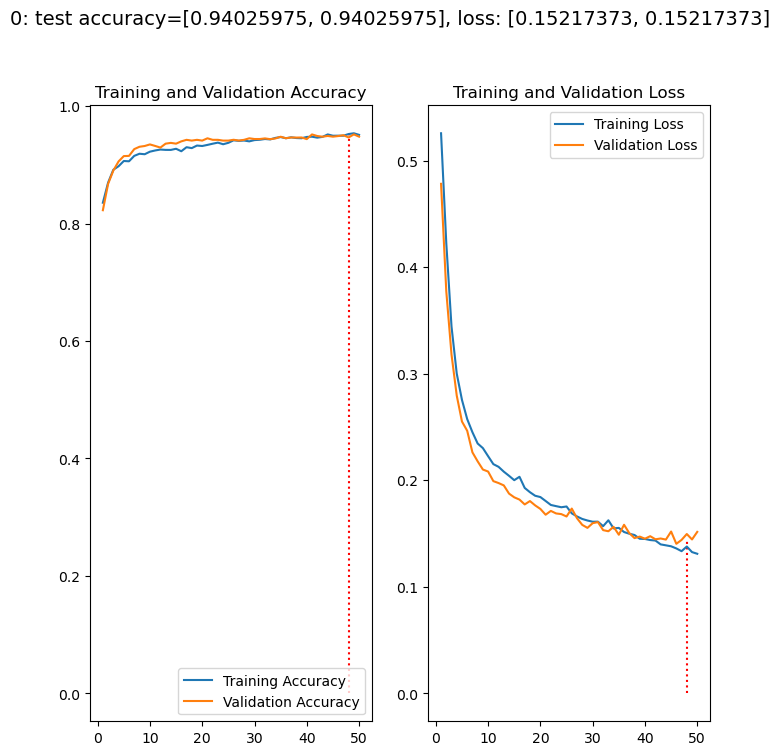

In [66]:
loss, acc = trainer.test()
trainer.plot_performance("task4_model_simple.png")

***
#### Q2: What values are optimized during the training process of a CNN? Why isn't the validation accuracy increasing after some time? Why do we use a validation dataset?

#ANSWER HERE

### 3 Regularization
#### 3.1 Network Structure

With the basic model you should have achieved a test accuracy of about 95% As you can see on the last model performance, the simple model starts to overfit on the training data. One option to improve generalization is to use regularization. You can add batch normalization and dropout to do so. Update the **MaskClassifier** to include those techniques. Add dropout and batch normalization before suitable layers. Use the dropout parameter passed to the constructor for the dropout rate.

Create a new model with a dropout rate of **dropout=0.5** or **batch_norm=True** and name it **'model_regularized'**. Take a look at the structure of your model by calling ***summary(model2)***. 


In [78]:
model_regularized = my_model.MaskClassifier(name="mask_classifier_regularized", img_size=img_size, dropout=0.5, batch_norm=True)
summary(model_regularized)

Layer (type:depth-idx)                   Param #
MaskClassifier                           --
├─Conv2d: 1-1                            896
├─MaxPool2d: 1-2                         --
├─Conv2d: 1-3                            9,248
├─MaxPool2d: 1-4                         --
├─Linear: 1-5                            6,273
├─BatchNorm2d: 1-6                       64
├─BatchNorm2d: 1-7                       64
├─Dropout: 1-8                           --
Total params: 16,545
Trainable params: 16,545
Non-trainable params: 0

***
#### Q3: Compare the network structure of the model with and without regularization. What will be the effect of the dropout rate you have chosen? What is the effect of batch normalization?

#ANSWER HERE

#### 3.2 Training the network

Create a new Trainer object called **trainer2**.
Train the second network, using the same learning rate you used for the first model and set the number of epochs around **50**. 
You can use the same Data Module as for the simple model.


In [79]:
trainer_regularized = my_trainer.Trainer(model_regularized, data_module)
trainer_regularized.fit(epochs=50, lr=0.0001)

Epoch 0: 100%|█████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.88it/s]


Epoch 0 Training: Loss: 0.5192191004753113 Accuracy: 0.7506009340286255
Epoch 0 Validation: Loss: 0.41761064529418945 Accuracy: 0.8506944179534912


Epoch 1: 100%|█████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.93it/s]


Epoch 1 Training: Loss: 0.3112822473049164 Accuracy: 0.8830128908157349
Epoch 1 Validation: Loss: 0.2609991133213043 Accuracy: 0.9029514193534851


Epoch 2: 100%|█████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.97it/s]


Epoch 2 Training: Loss: 0.26079505681991577 Accuracy: 0.9057348966598511
Epoch 2 Validation: Loss: 0.22027580440044403 Accuracy: 0.9240451455116272


Epoch 3: 100%|█████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.94it/s]


Epoch 3 Training: Loss: 0.22402650117874146 Accuracy: 0.9179831147193909
Epoch 3 Validation: Loss: 0.22649754583835602 Accuracy: 0.9165799021720886


Epoch 4: 100%|█████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.02it/s]


Epoch 4 Training: Loss: 0.20755532383918762 Accuracy: 0.9244219660758972
Epoch 4 Validation: Loss: 0.18695487082004547 Accuracy: 0.9426215291023254


Epoch 5: 100%|█████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  3.00it/s]


Epoch 5 Training: Loss: 0.1867038756608963 Accuracy: 0.9336939454078674
Epoch 5 Validation: Loss: 0.1838410347700119 Accuracy: 0.9426215291023254


Epoch 6: 100%|█████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.91it/s]


Epoch 6 Training: Loss: 0.17726890742778778 Accuracy: 0.9378148317337036
Epoch 6 Validation: Loss: 0.16629363596439362 Accuracy: 0.953038215637207


Epoch 7: 100%|█████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.99it/s]


Epoch 7 Training: Loss: 0.16822515428066254 Accuracy: 0.9395604729652405
Epoch 7 Validation: Loss: 0.1597040891647339 Accuracy: 0.9556424021720886


Epoch 8: 100%|█████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.97it/s]


Epoch 8 Training: Loss: 0.15123234689235687 Accuracy: 0.9454269409179688
Epoch 8 Validation: Loss: 0.15657441318035126 Accuracy: 0.9582465291023254


Epoch 9: 100%|█████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.01it/s]


Epoch 9 Training: Loss: 0.1490791290998459 Accuracy: 0.9456273317337036
Epoch 9 Validation: Loss: 0.15037567913532257 Accuracy: 0.9556424021720886


Epoch 10: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.97it/s]


Epoch 10 Training: Loss: 0.14104153215885162 Accuracy: 0.9499771595001221
Epoch 10 Validation: Loss: 0.1646408885717392 Accuracy: 0.9465277791023254


Epoch 11: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.98it/s]


Epoch 11 Training: Loss: 0.13575401902198792 Accuracy: 0.9509214758872986
Epoch 11 Validation: Loss: 0.14404569566249847 Accuracy: 0.9517361521720886


Epoch 12: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.01it/s]


Epoch 12 Training: Loss: 0.13039223849773407 Accuracy: 0.9558436274528503
Epoch 12 Validation: Loss: 0.1386495679616928 Accuracy: 0.9556424021720886


Epoch 13: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.02it/s]


Epoch 13 Training: Loss: 0.12677884101867676 Accuracy: 0.9531536102294922
Epoch 13 Validation: Loss: 0.1364302933216095 Accuracy: 0.9556424021720886


Epoch 14: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.97it/s]


Epoch 14 Training: Loss: 0.12393886595964432 Accuracy: 0.9554715752601624
Epoch 14 Validation: Loss: 0.15152038633823395 Accuracy: 0.9504340291023254


Epoch 15: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.00it/s]


Epoch 15 Training: Loss: 0.115631103515625 Accuracy: 0.9600217938423157
Epoch 15 Validation: Loss: 0.1401420533657074 Accuracy: 0.9556424021720886


Epoch 16: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.97it/s]


Epoch 16 Training: Loss: 0.1081998199224472 Accuracy: 0.9613381624221802
Epoch 16 Validation: Loss: 0.14035587012767792 Accuracy: 0.9556424021720886


Epoch 17: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.88it/s]


Epoch 17 Training: Loss: 0.10609161108732224 Accuracy: 0.9644860625267029
Epoch 17 Validation: Loss: 0.1307954043149948 Accuracy: 0.9582465291023254


Epoch 18: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.03it/s]


Epoch 18 Training: Loss: 0.10028073936700821 Accuracy: 0.9688644409179688
Epoch 18 Validation: Loss: 0.13188093900680542 Accuracy: 0.956944465637207


Epoch 19: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.96it/s]


Epoch 19 Training: Loss: 0.09797833114862442 Accuracy: 0.9644860625267029
Epoch 19 Validation: Loss: 0.1243753731250763 Accuracy: 0.9595486521720886


Epoch 20: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.91it/s]


Epoch 20 Training: Loss: 0.09303012490272522 Accuracy: 0.9693223834037781
Epoch 20 Validation: Loss: 0.13803072273731232 Accuracy: 0.9518229365348816


Epoch 21: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.92it/s]


Epoch 21 Training: Loss: 0.09241779148578644 Accuracy: 0.969122052192688
Epoch 21 Validation: Loss: 0.1257762908935547 Accuracy: 0.9543402791023254


Epoch 22: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.94it/s]


Epoch 22 Training: Loss: 0.08743699640035629 Accuracy: 0.9702380895614624
Epoch 22 Validation: Loss: 0.12208142876625061 Accuracy: 0.9556424021720886


Epoch 23: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.91it/s]


Epoch 23 Training: Loss: 0.08674456179141998 Accuracy: 0.9694082140922546
Epoch 23 Validation: Loss: 0.12775401771068573 Accuracy: 0.953038215637207


Epoch 24: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.90it/s]


Epoch 24 Training: Loss: 0.083647720515728 Accuracy: 0.9705243110656738
Epoch 24 Validation: Loss: 0.12109432369470596 Accuracy: 0.9582465291023254


Epoch 25: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.94it/s]


Epoch 25 Training: Loss: 0.08146370947360992 Accuracy: 0.9730426073074341
Epoch 25 Validation: Loss: 0.11443126946687698 Accuracy: 0.9621527791023254


Epoch 26: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.91it/s]


Epoch 26 Training: Loss: 0.07614392787218094 Accuracy: 0.9756467938423157
Epoch 26 Validation: Loss: 0.1216166540980339 Accuracy: 0.9556424021720886


Epoch 27: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.90it/s]


Epoch 27 Training: Loss: 0.07536393404006958 Accuracy: 0.9750744104385376
Epoch 27 Validation: Loss: 0.11694686859846115 Accuracy: 0.9544270634651184


Epoch 28: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.96it/s]


Epoch 28 Training: Loss: 0.07313510030508041 Accuracy: 0.9779647588729858
Epoch 28 Validation: Loss: 0.11506525427103043 Accuracy: 0.9582465291023254


Epoch 29: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.93it/s]


Epoch 29 Training: Loss: 0.0722280815243721 Accuracy: 0.9775069355964661
Epoch 29 Validation: Loss: 0.11029919981956482 Accuracy: 0.9609375


Epoch 30: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.95it/s]


Epoch 30 Training: Loss: 0.0666099339723587 Accuracy: 0.9783368110656738
Epoch 30 Validation: Loss: 0.11367855221033096 Accuracy: 0.9582465291023254


Epoch 31: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.02it/s]


Epoch 31 Training: Loss: 0.06551508605480194 Accuracy: 0.9794528484344482
Epoch 31 Validation: Loss: 0.11675307154655457 Accuracy: 0.9609375


Epoch 32: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.99it/s]


Epoch 32 Training: Loss: 0.06283442676067352 Accuracy: 0.982429027557373
Epoch 32 Validation: Loss: 0.11483947187662125 Accuracy: 0.9595486521720886


Epoch 33: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.94it/s]


Epoch 33 Training: Loss: 0.06268546730279922 Accuracy: 0.978708803653717
Epoch 33 Validation: Loss: 0.11047527939081192 Accuracy: 0.9596354365348816


Epoch 34: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.92it/s]


Epoch 34 Training: Loss: 0.0651501715183258 Accuracy: 0.9782509803771973
Epoch 34 Validation: Loss: 0.12634222209453583 Accuracy: 0.95703125


Epoch 35: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.99it/s]


Epoch 35 Training: Loss: 0.058363884687423706 Accuracy: 0.9815991520881653
Epoch 35 Validation: Loss: 0.10658127069473267 Accuracy: 0.9582465291023254


Epoch 36: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.99it/s]


Epoch 36 Training: Loss: 0.05272601172327995 Accuracy: 0.9866071343421936
Epoch 36 Validation: Loss: 0.11341717839241028 Accuracy: 0.9622395634651184


Epoch 37: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.96it/s]


Epoch 37 Training: Loss: 0.05126471072435379 Accuracy: 0.9839171171188354
Epoch 37 Validation: Loss: 0.11201510578393936 Accuracy: 0.956944465637207


Epoch 38: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.98it/s]


Epoch 38 Training: Loss: 0.05272294208407402 Accuracy: 0.9866071343421936
Epoch 38 Validation: Loss: 0.10132763534784317 Accuracy: 0.968663215637207


Epoch 39: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.98it/s]


Epoch 39 Training: Loss: 0.053976912051439285 Accuracy: 0.9832589030265808
Epoch 39 Validation: Loss: 0.10019562393426895 Accuracy: 0.9660590291023254


Epoch 40: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.96it/s]


Epoch 40 Training: Loss: 0.047745250165462494 Accuracy: 0.9869791865348816
Epoch 40 Validation: Loss: 0.11745909601449966 Accuracy: 0.9609375


Epoch 41: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.02it/s]


Epoch 41 Training: Loss: 0.047492485493421555 Accuracy: 0.986893355846405
Epoch 41 Validation: Loss: 0.11826660484075546 Accuracy: 0.9635416865348816


Epoch 42: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:15<00:00,  2.65it/s]


Epoch 42 Training: Loss: 0.048833977431058884 Accuracy: 0.986521303653717
Epoch 42 Validation: Loss: 0.09857630729675293 Accuracy: 0.9673611521720886


Epoch 43: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.87it/s]


Epoch 43 Training: Loss: 0.04726550355553627 Accuracy: 0.9880093932151794
Epoch 43 Validation: Loss: 0.11358217149972916 Accuracy: 0.9609375


Epoch 44: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.99it/s]


Epoch 44 Training: Loss: 0.044645704329013824 Accuracy: 0.9873511791229248
Epoch 44 Validation: Loss: 0.12357139587402344 Accuracy: 0.9596354365348816


Epoch 45: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.95it/s]


Epoch 45 Training: Loss: 0.045925986021757126 Accuracy: 0.988095223903656
Epoch 45 Validation: Loss: 0.10586347430944443 Accuracy: 0.9595486521720886


Epoch 46: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:15<00:00,  2.80it/s]


Epoch 46 Training: Loss: 0.04512858763337135 Accuracy: 0.9856914281845093
Epoch 46 Validation: Loss: 0.09643316268920898 Accuracy: 0.9699652791023254


Epoch 47: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.85it/s]


Epoch 47 Training: Loss: 0.04127195477485657 Accuracy: 0.9883814454078674
Epoch 47 Validation: Loss: 0.11551886051893234 Accuracy: 0.9583333134651184


Epoch 48: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.89it/s]


Epoch 48 Training: Loss: 0.0399765782058239 Accuracy: 0.9903273582458496
Epoch 48 Validation: Loss: 0.11516257375478745 Accuracy: 0.9622395634651184


Epoch 49: 100%|████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.87it/s]


Epoch 49 Training: Loss: 0.04086480289697647 Accuracy: 0.990241527557373
Epoch 49 Validation: Loss: 0.10313615947961807 Accuracy: 0.96484375


#### 3.3 Plot Performance

Plot the performance of the second model with ***trainer2.plot_performance(..)***.

***Submission:*** Save the output of ***trainer2.plot_performance(..)*** as **task4_model_regularized.png**

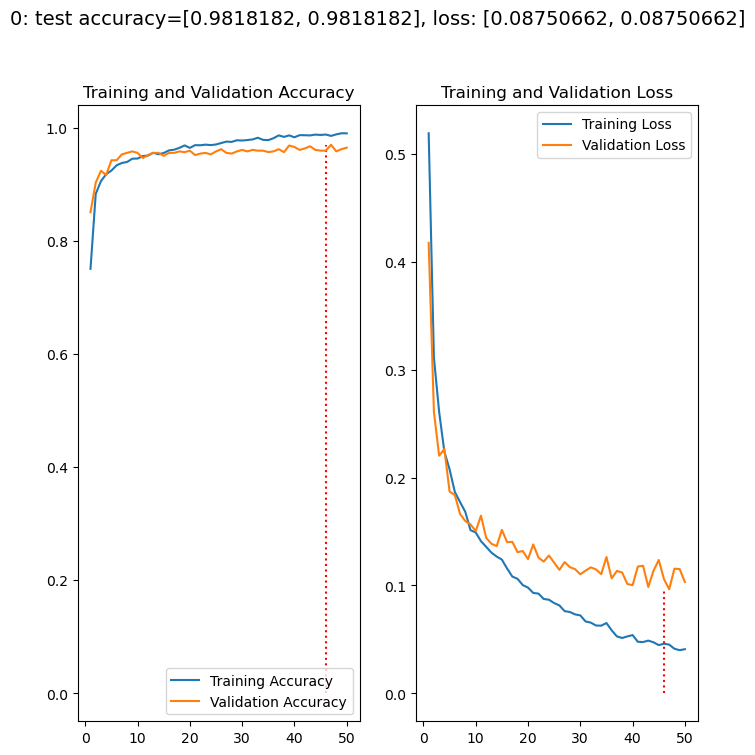

In [81]:
loss_regularized, acc_regularized = trainer_regularized.test()
trainer_regularized.plot_performance("task4_model_regularized.png")

***
#### Q4: Compare the performance of the model with and without regularization. Where do you see improvements?


#ANSWER HERE 

### 4 Data Augmentation
#### 4.1 Advanced Data Pre-Processing
You will enhance generalization of the network by artificially adding more variety to the training data. Implement data augmentation in **get_transforms** method of **my_datamodule**. Have a look at [torchvision transforms](https://pytorch.org/vision/stable/transforms.html) and choose at least three data augmentation techniques.

#### 4.2 Activation Maps before Training
Create a model with a dropout rate of **60%** and batch normalization. Use a learning rate of approximately **0.0007**. Call the model **'model_augmented'**.

The convolutional layers in the network are initialised with random values. We are going to compare the activation maps before and after the training process. Use ***utils.plot_activation_maps(..)*** to plot some untrained activation maps and filter kernels of the third model. 

Get two image sample of the augmented training dataset with **sample=dm2.train_dataset[...][0]**, one with a mask and one without a mask. Pass each image sample to ***utils.plot_activation_maps(..)***.


***Submission:*** Save the activation maps of the untrained model as **task4_face_activation_maps_before.png** and **task4_mask_activation_maps_before.png** using ***utils.plot_activation_maps(..)***



#### 4.3 Training the network
Create a third trainer object and train the third network here using the augmented datamodule. Set the epochs to around **100**.

Depending on your hardware this might take longer than the last training sessions.

#### 4.4. Performance Evaluation 
Plot the model performance of the third model with ***trainer3.plot_performance(..)***.

***Submission:*** Save the output of ***model.plot_curve(..)*** as **task4_model_augmented.png**

***
#### Q5: Look at the performance of the third model over time, what do you observe compared to the first two models? Explain underfitting/overfitting based on your plots.

#ANSWER HERE

#### 4.5 Activation Maps after Training
During training the weights of the model are adapted to the feature distribution of the training dataset. Plot some activation maps of the third model again using ***utils.plot_activation_maps(..)***. Use the same image samples you used before.

***Submission:*** Save the activation maps after the training as **task4_mask_activation_maps_after.png** and **task4_face_activation_maps_after.png** using ***utils.plot_activation_maps(..)***

***
#### Q6: The activations and filter kernels after the training have changed, what do you observe? Explain possible reasons.


#ANSWER HERE 

### 5 Evaluation

Calculate the confusion matrix. You can use the function **confusion_matrix** from **sklearn.metrics**. A confusion matrix within a binary decision problem shows:
 - "true positive" for correctly predicted event values.
 - "false positive" for incorrectly predicted event values.
 - "true negative" for correctly predicted no-event values.
 - "false negative" for incorrectly predicted no-event values.

You can obtain the test data and labes by using **X, y = next(iter(dm2.text_dataloader()))**. Use **trainer3.predict(X)** to obtain the predicted value. You can convert a tensor to a numpy array by using **y.detach().numpy()**. 

***
#### Q7: Compare the approach for classification from TASK3 and TASK4. Discuss advantages, disadvantages, strength and weakness. 


#ANSWER HERE